# Car Price Assignment

In [1]:
# Importing all the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Uploading and reading the Data set
pd.set_option("display.max_columns", 500)
car = pd.read_csv("CarPrice_Assignment.csv")
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# Checking the info and data types of the columns
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [4]:
# Splitting the CarName column to only get company name:
new = car['CarName'].str.split(" ", n=1, expand= True)
car['company'] = new[0]
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [5]:
# Counting the no. of categories in columns 
print(car['company'].value_counts())
print(car['carbody'].value_counts())
print(car['enginetype'].value_counts())
print(car['cylindernumber'].value_counts())
print((car['fuelsystem'].value_counts()))

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
maxda           2
vw              2
renault         2
toyouta         1
porcshce        1
Nissan          1
mercury         1
vokswagen       1
Name: company, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: f

- we can see that some of the categories have spelling mistakes which creates new categories. So, we have to correct these spelling mistakes

In [6]:
# Replacing the categories with spelling mistakes with correct categories
car['company'] = car['company'].str.replace("Nissan", "nissan")
car['company'] = car['company'].str.replace("toyouta", "toyota")
car['company'] = car['company'].str.replace("maxda", "mazda")
car['company'] = car['company'].str.replace("vokswagen", "volkswagen")
car['company'] = car['company'].str.replace("vw", "volkswagen")
car['company'] = car['company'].str.replace("porcshce", "porsche")

print(car['company'].value_counts())

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
alfa-romero     3
chevrolet       3
renault         2
mercury         1
Name: company, dtype: int64


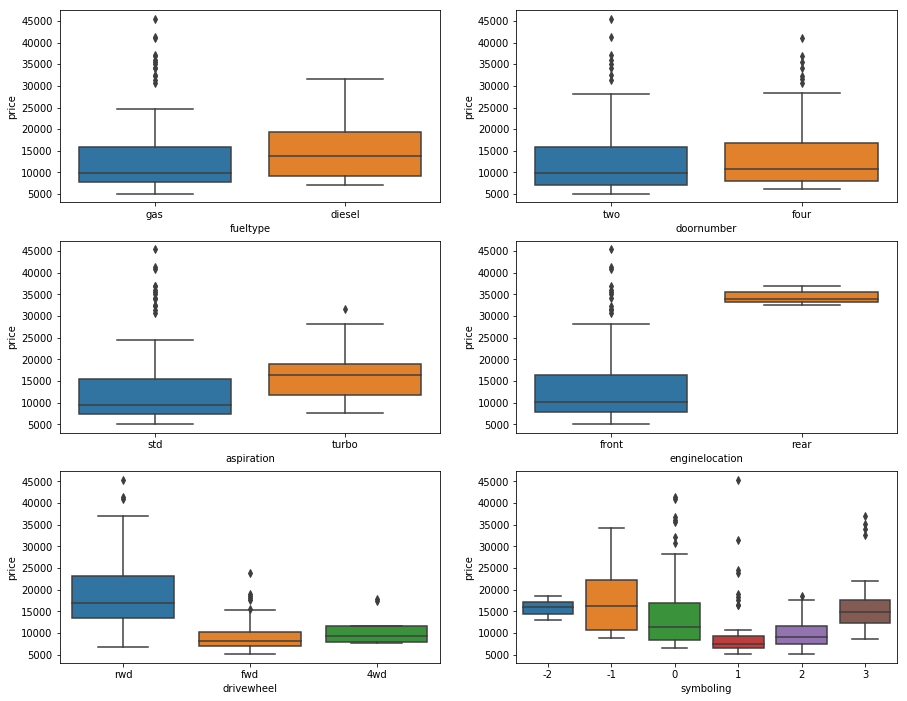

In [7]:
# Creating Boxplots with respect to Price to check the realtionship b/w variables and price:

plt.figure(figsize=(15,12))

plt.subplot(3,2,1)
sns.boxplot(x='fueltype', y='price', data=car)

plt.subplot(3,2,2)
sns.boxplot(x='doornumber', y='price', data=car)

plt.subplot(3,2,3)
sns.boxplot(x='aspiration', y='price', data=car)

plt.subplot(3,2,4)
sns.boxplot(x='enginelocation', y='price', data=car)

plt.subplot(3,2,5)
sns.boxplot(x='drivewheel', y='price', data=car)

plt.subplot(3,2,6)
sns.boxplot(x='symboling', y='price', data=car)

plt.show()

- In fueltype we can see that there much difference in the median of the two categories
- In doornumber we found that median of the both categories are almost on similar level while the price range is almost same as well
- In aspiration we find that price range of turbo is significantly higher than that of standard
- Enginelocation in rear is well above than the front location in pricing 
- Pricing of rwd is well above from other categories in drivewheel
-

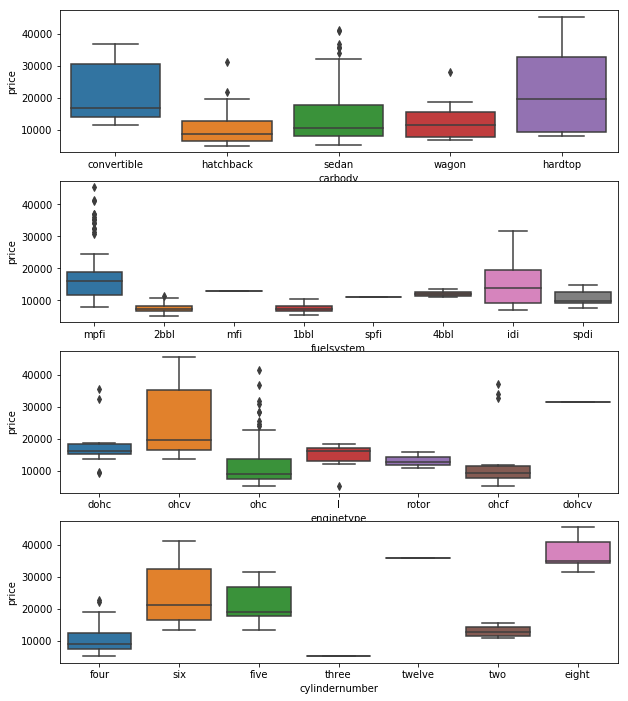

In [8]:
plt.figure(figsize=(10,12))

plt.subplot(4,1,1)
sns.boxplot(x='carbody', y='price', data=car)

plt.subplot(4,1,2)
sns.boxplot(x='fuelsystem', y='price', data=car)

plt.subplot(4,1,3)
sns.boxplot(x='enginetype', y='price', data=car)

plt.subplot(4,1,4)
sns.boxplot(x='cylindernumber', y='price', data=car)

plt.show()

- Convertible and hardtop type carbody are in price range while other categories have low price range
- Fuel system with mpfi and idi are bit highly priced against the other categories
- Ohcv enginetype attracts the high prce and dohcv also other categories does not go above 20000 mark
- We can see as cylinder number increases above four the price attracts higher values as more number of cylinders are usually used in sports and luxary line cars

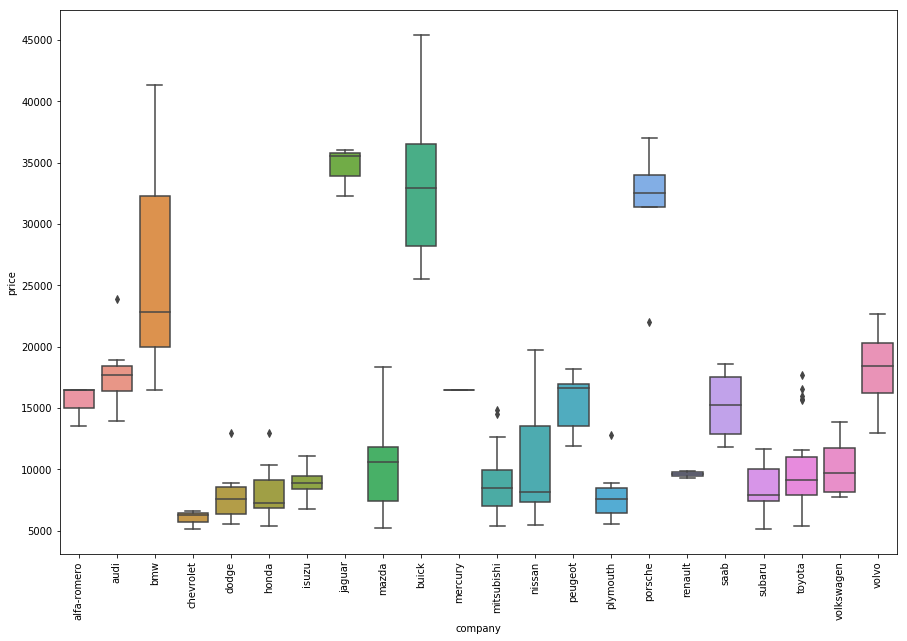

In [9]:
plt.figure(figsize=(15,10))
sns.boxplot(x='company', y='price', data=car)
plt.xticks(rotation=90)
plt.show()

- Some companies have very less price range while others have high price range. We can consider the companies with very high price range as luxary brands 

In [10]:
# Handling the outliers if present in the numerical columns
# Detecting the upper and lower values from which we can determine values above/below those are outliers
numeric_col = ['wheelbase', 'carlength', 'carheight', 'curbweight', 'peakrpm', 'carwidth', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower','citympg','highwaympg','price']
df1 = car[numeric_col]
df1_q1 = df1.quantile(0.25)
df1_q3 = df1.quantile(0.75)
iqr = df1_q3 - df1_q1
l_out = df1_q1 - (1.5*iqr)
u_out = df1_q3 + (1.5*iqr)

print("Inter quartile range:\n", iqr)
print("Lower quantile value:\n", l_out)
print("Upper quantile values:\n", u_out)

Inter quartile range:
 wheelbase              7.90
carlength             16.80
carheight              3.50
curbweight           790.00
peakrpm              700.00
carwidth               2.80
enginesize            44.00
boreratio              0.43
stroke                 0.30
compressionratio       0.80
horsepower            46.00
citympg               11.00
highwaympg             9.00
price               8715.00
dtype: float64
Lower quantile value:
 wheelbase             82.650
carlength            141.100
carheight             46.750
curbweight           960.000
peakrpm             3750.000
carwidth              59.900
enginesize            31.000
boreratio              2.505
stroke                 2.660
compressionratio       7.400
horsepower             1.000
citympg                2.500
highwaympg            11.500
price              -5284.500
dtype: float64
Upper quantile values:
 wheelbase             114.250
carlength             208.300
carheight              60.750
curbweight  

- These are the threshold limits above and below them we have outliers

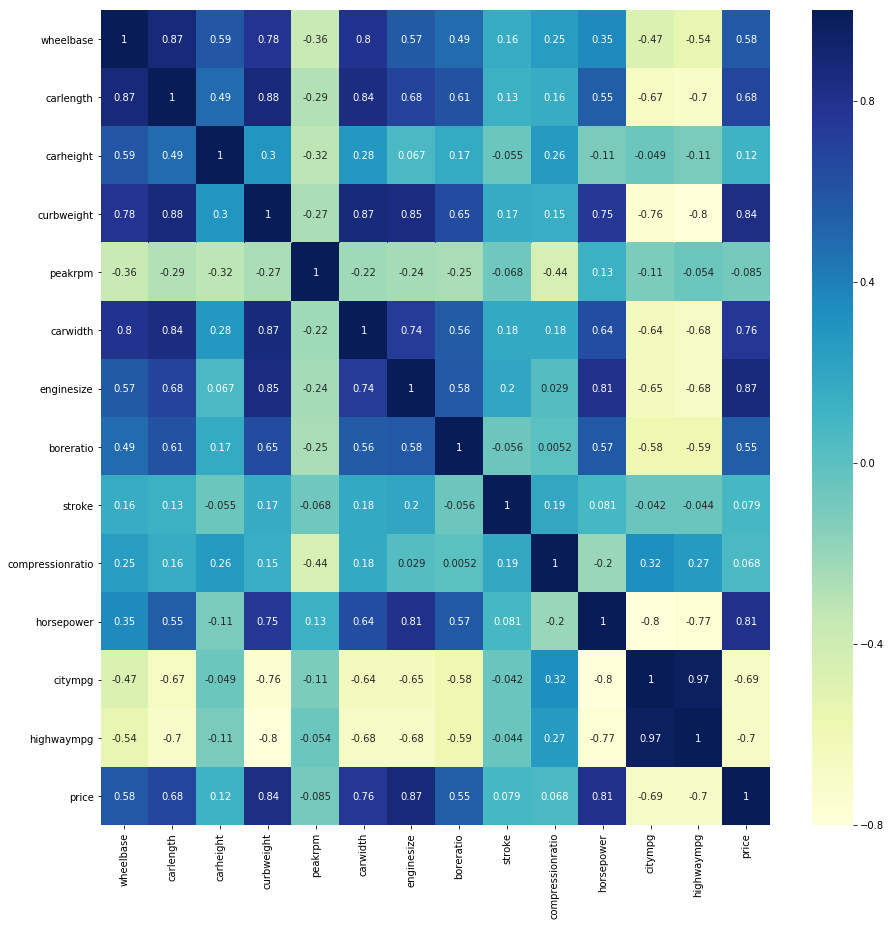

In [11]:
# Checking the correlation of numerical variables with target variable price 
numeric_col = ['wheelbase', 'carlength', 'carheight', 'curbweight', 'peakrpm', 'carwidth', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower','citympg','highwaympg','price']
df_heat = car[numeric_col]
plt.figure(figsize=(15,15))
sns.heatmap(df_heat.corr(), annot=True, cmap='YlGnBu')
plt.show()

## Data Prepration

In [12]:
# Handling Categorical variables that have 2 categories and variables which are ordered 
# Considering 'Symboling' variable as ordered categorical variable as value ranges [-2,3]
le = LabelEncoder()
cols = ['fueltype','aspiration','doornumber','enginelocation', 'symboling']
car[cols] = car[cols].apply(le.fit_transform)

car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,5,alfa-romero giulia,1,0,1,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,5,alfa-romero stelvio,1,0,1,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,3,alfa-romero Quadrifoglio,1,0,1,hatchback,rwd,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,4,audi 100 ls,1,0,0,sedan,fwd,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,4,audi 100ls,1,0,0,sedan,4wd,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [13]:
# Now handling of the categorcial variables
# For variables having more than 2 categories we check the percentage of values in datasets :
print((car['carbody'].value_counts()/len(car))*100)
print((car['enginetype'].value_counts()/len(car))*100)
print((car['cylindernumber'].value_counts()/len(car))*100)
print((car['fuelsystem'].value_counts()/len(car))*100)
print((car['company'].value_counts()/len(car))*100)
print((car['drivewheel'].value_counts()/len(car))*100)

sedan          46.829268
hatchback      34.146341
wagon          12.195122
hardtop         3.902439
convertible     2.926829
Name: carbody, dtype: float64
ohc      72.195122
ohcf      7.317073
ohcv      6.341463
dohc      5.853659
l         5.853659
rotor     1.951220
dohcv     0.487805
Name: enginetype, dtype: float64
four      77.560976
six       11.707317
five       5.365854
eight      2.439024
two        1.951220
twelve     0.487805
three      0.487805
Name: cylindernumber, dtype: float64
mpfi    45.853659
2bbl    32.195122
idi      9.756098
1bbl     5.365854
spdi     4.390244
4bbl     1.463415
spfi     0.487805
mfi      0.487805
Name: fuelsystem, dtype: float64
toyota         15.609756
nissan          8.780488
mazda           8.292683
mitsubishi      6.341463
honda           6.341463
volkswagen      5.853659
subaru          5.853659
volvo           5.365854
peugeot         5.365854
dodge           4.390244
bmw             3.902439
buick           3.902439
audi            3.414634


In [14]:
# Combining categories of variables which have very less values in one category
comp_cat = ['porsche','mercury','chevrolet','audi','peugeot','alfa-romero','isuzu', 'jaguar', 'renault']
car['company'] = car['company'].apply(str).replace(comp_cat, "o-company")

fuelsy_cat = ['1bbl','spdi','4bbl','spfi', 'mfi']
car['fuelsystem'] = car['fuelsystem'].apply(str).replace(fuelsy_cat, "o-fuelsys")

et_cat = ['dohc', 'ohcv','rotor','l', 'dohcv']
car['enginetype'] = car['enginetype'].apply(str).replace(et_cat, "o-enginetyp")

cy_cat = ['two','five', 'eight', 'three','twelve']
car['cylindernumber'] = car['cylindernumber'].apply(str).replace(cy_cat, "o-cylinder")

cb_cat = ['wagon', 'hardtop', 'convertible']
car['carbody'] = car['carbody'].apply(str).replace(cb_cat, "o-carbody")

# Checking the unique values of the categories and there counts
print((car['carbody'].value_counts()/len(car))*100)
print((car['enginetype'].value_counts()/len(car))*100)
print((car['cylindernumber'].value_counts()/len(car))*100)
print((car['fuelsystem'].value_counts()/len(car))*100)
print((car['company'].value_counts()/len(car))*100)
print((car['drivewheel'].value_counts()/len(car))*100)

sedan        46.829268
hatchback    34.146341
o-carbody    19.024390
Name: carbody, dtype: float64
ohc            72.195122
o-enginetyp    20.487805
ohcf            7.317073
Name: enginetype, dtype: float64
four          77.560976
six           11.707317
o-cylinder    10.731707
Name: cylindernumber, dtype: float64
mpfi         45.853659
2bbl         32.195122
o-fuelsys    12.195122
idi           9.756098
Name: fuelsystem, dtype: float64
o-company     19.024390
toyota        15.609756
nissan         8.780488
mazda          8.292683
honda          6.341463
mitsubishi     6.341463
volkswagen     5.853659
subaru         5.853659
volvo          5.365854
dodge          4.390244
bmw            3.902439
buick          3.902439
plymouth       3.414634
saab           2.926829
Name: company, dtype: float64
fwd    58.536585
rwd    37.073171
4wd     4.390244
Name: drivewheel, dtype: float64


In [15]:
# Dummy variables for remaining categorical variables 
df_co = pd.get_dummies(car['company'], drop_first=True)
df_fs = pd.get_dummies(car['fuelsystem'], drop_first=True)
df_dw = pd.get_dummies(car['drivewheel'], drop_first=True)
df_cn = pd.get_dummies(car['cylindernumber'], drop_first=True)
df_et = pd.get_dummies(car['enginetype'], drop_first=True)
df_cb = pd.get_dummies(car['carbody'], drop_first=True)

# Concating the dummies with original data set
df_1 = pd.concat([car, df_co], axis=1)
df_2 = pd.concat([df_1, df_fs], axis=1)
df_3 = pd.concat([df_2, df_dw], axis=1)
df_4 = pd.concat([df_3, df_cn], axis=1)
df_5 = pd.concat([df_4, df_et], axis=1)
df = pd.concat([df_5, df_cb], axis=1)

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company,buick,dodge,honda,mazda,mitsubishi,nissan,o-company,plymouth,saab,subaru,toyota,volkswagen,volvo,idi,mpfi,o-fuelsys,fwd,rwd,o-cylinder,six,ohc,ohcf,o-carbody,sedan
0,1,5,alfa-romero giulia,1,0,1,o-carbody,rwd,0,88.6,168.8,64.1,48.8,2548,o-enginetyp,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,o-company,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
1,2,5,alfa-romero stelvio,1,0,1,o-carbody,rwd,0,88.6,168.8,64.1,48.8,2548,o-enginetyp,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,o-company,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
2,3,3,alfa-romero Quadrifoglio,1,0,1,hatchback,rwd,0,94.5,171.2,65.5,52.4,2823,o-enginetyp,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,o-company,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
3,4,4,audi 100 ls,1,0,0,sedan,fwd,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,o-company,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1
4,5,4,audi 100ls,1,0,0,sedan,4wd,0,99.4,176.6,66.4,54.3,2824,ohc,o-cylinder,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,o-company,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1


In [16]:
# Dropping columns that are not required
df = df.drop(['car_ID', 'CarName','carbody','drivewheel','enginetype','cylindernumber','fuelsystem', 'company'], axis=1)

df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,buick,dodge,honda,mazda,mitsubishi,nissan,o-company,plymouth,saab,subaru,toyota,volkswagen,volvo,idi,mpfi,o-fuelsys,fwd,rwd,o-cylinder,six,ohc,ohcf,o-carbody,sedan
0,5,1,0,1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
1,5,1,0,1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
2,3,1,0,1,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
3,4,1,0,0,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1
4,4,1,0,0,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1


In [17]:
df.shape

(205, 43)

In [18]:
# Splitting the data in training and testing 
df_train, df_test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=100)

print(df_test.shape)
print(df_train.shape)

(41, 43)
(164, 43)


## Model Building

In [19]:
# Normalising the numerical values 
numeric_col = ['wheelbase', 'carlength', 'carheight', 'curbweight', 'peakrpm', 'carwidth', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower','citympg','highwaympg','price']

scaler = MinMaxScaler()

df_train[numeric_col] = scaler.fit_transform(df_train[numeric_col])

df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,buick,dodge,honda,mazda,mitsubishi,nissan,o-company,plymouth,saab,subaru,toyota,volkswagen,volvo,idi,mpfi,o-fuelsys,fwd,rwd,o-cylinder,six,ohc,ohcf,o-carbody,sedan
3,4,1,0,0,0,0.455172,0.577236,0.491667,0.541667,0.329325,0.181132,0.404762,0.611111,0.18750,0.225000,0.551020,0.305556,0.351351,0.243998,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1
157,2,1,0,0,0,0.313793,0.409756,0.341667,0.416667,0.240884,0.139623,0.404762,0.424242,0.12500,0.091667,0.265306,0.472222,0.540541,0.057463,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
81,5,1,0,1,0,0.334483,0.518699,0.425000,0.133333,0.325834,0.230189,0.531746,0.641414,0.09375,0.166667,0.346939,0.333333,0.405405,0.093406,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
32,3,1,0,1,0,0.244828,0.144715,0.308333,0.400000,0.135376,0.067925,0.182540,0.444444,0.19375,0.050000,0.551020,0.694444,0.675676,0.007763,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
99,2,1,0,0,0,0.365517,0.525203,0.408333,0.575000,0.324282,0.222642,0.515873,0.646465,0.09375,0.204167,0.428571,0.388889,0.459459,0.105838,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [20]:
# Splitting Target variables and independent variables from the dataset
y_train = df_train.pop('price')
X_train = df_train

print(y_train.shape)
print(X_train.shape)

(164,)
(164, 42)


In [21]:
# Using Recursive feature selection
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('symboling', False, 24),
 ('fueltype', False, 11),
 ('aspiration', False, 27),
 ('doornumber', False, 23),
 ('enginelocation', True, 1),
 ('wheelbase', False, 9),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 6),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 7),
 ('stroke', False, 22),
 ('compressionratio', False, 12),
 ('horsepower', False, 8),
 ('peakrpm', False, 4),
 ('citympg', False, 28),
 ('highwaympg', False, 13),
 ('buick', False, 5),
 ('dodge', True, 1),
 ('honda', True, 1),
 ('mazda', True, 1),
 ('mitsubishi', True, 1),
 ('nissan', True, 1),
 ('o-company', True, 1),
 ('plymouth', True, 1),
 ('saab', False, 3),
 ('subaru', True, 1),
 ('toyota', True, 1),
 ('volkswagen', True, 1),
 ('volvo', False, 2),
 ('idi', False, 10),
 ('mpfi', False, 18),
 ('o-fuelsys', False, 20),
 ('fwd', False, 26),
 ('rwd', False, 25),
 ('o-cylinder', False, 19),
 ('six', False, 15),
 ('ohc', False, 21),
 ('ohcf', False, 14),
 ('o-carbody', False,

In [22]:
# Checking the top variables selected from RFE
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'dodge', 'honda', 'mazda', 'mitsubishi', 'nissan', 'o-company',
       'plymouth', 'subaru', 'toyota', 'volkswagen'],
      dtype='object')

In [23]:
# Creating a dataset of variables comprising of RFE selected columns
X_train_rfe = X_train[col]

X_train_rfe.head()

,enginelocation,carlength,carwidth,curbweight,enginesize,dodge,honda,mazda,mitsubishi,nissan,o-company,plymouth,subaru,toyota,volkswagen
3,0,0.577236,0.491667,0.329325,0.181132,0,0,0,0,0,1,0,0,0,0
157,0,0.409756,0.341667,0.240884,0.139623,0,0,0,0,0,0,0,0,1,0
81,0,0.518699,0.425000,0.325834,0.230189,0,0,0,1,0,0,0,0,0,0
32,0,0.144715,0.308333,0.135376,0.067925,0,1,0,0,0,0,0,0,0,0
99,0,0.525203,0.408333,0.324282,0.222642,0,0,0,0,1,0,0,0,0,0


In [24]:
# Model 1 
X_sm = sm.add_constant(X_train_rfe)
ls1 = sm.OLS(y_train, X_sm).fit()
ls1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     97.20
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.32e-68
Time:                        14:20:10   Log-Likelihood:                 217.32
No. Observations:                 164   AIC:                            -402.6
Df Residuals:                     148   BIC:                            -353.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0850      0.032      2.691      0.008       0.023       0.147
enginelocation     0.4345      0.053      8.185      0.000       0.330       0.539
carlength         -0.2795      0.066     -4.205      0.000      -0.411      -0.148
carwidth           0.2824      0.065      4.324      0.000       0.153       0.411
curbweight         0.4067      0.089      4.594      0.000       0.232       0.582
enginesize         0.5229      0.079      6.587      0.000       0.366       0.680
dodge             -0.1963      0.031     -6.257      0.000      -0.258      -0.134
honda             -0.1840      0.030     -6.140      0.000      -0.243      -0.125
mazda             -0.1296      0.027     -4.856      0.000      -0.182      -0.077
mitsubishi        -0.2197      0.028     -7.883      0.000      -0.275      -0.165
nissan            -0.1805      0.026     -7.000      0.000      -0.231      -0.130
o-company         -0.1296      0.020     -6.409      0.000      -0.170      -0.090
plymouth          -0.1808      0.037     -4.931      0.000      -0.253      -0.108
subaru            -0.1916      0.028     -6.893      0.000      -0.246      -0.137
toyota            -0.1906      0.023     -8.332      0.000      -0.236      -0.145
volkswagen        -0.1530      0.028     -5.554      0.000      -0.207      -0.099
==============================================================================
Omnibus:                       62.113   Durbin-Watson:                   1.764
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              418.778
Skew:                           1.178   Prob(JB):                     1.16e-91
Kurtosis:                      10.466   Cond. No.                         29.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# VIF for Model 1
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False)

,Features,VIF
3,curbweight,55.25
1,carlength,40.22
2,carwidth,35.15
4,enginesize,17.56
10,o-company,1.99
13,toyota,1.41
7,mazda,1.40
9,nissan,1.33
14,volkswagen,1.31
12,subaru,1.22


In [26]:
# Model 2
X2 = X_train_rfe.drop('curbweight', axis=1)
X2_sm = sm.add_constant(X2)
ls2 = sm.OLS(y_train, X2_sm).fit()
ls2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     90.43
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           2.39e-65
Time:                        14:20:10   Log-Likelihood:                 206.39
No. Observations:                 164   AIC:                            -382.8
Df Residuals:                     149   BIC:                            -336.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0687      0.033      2.055      0.042       0.003       0.135
enginelocation     0.4221      0.056      7.473      0.000       0.310       0.534
carlength         -0.1092      0.059     -1.858      0.065      -0.225       0.007
carwidth           0.3648      0.067      5.452      0.000       0.233       0.497
enginesize         0.7614      0.064     11.903      0.000       0.635       0.888
dodge             -0.1945      0.033     -5.819      0.000      -0.260      -0.128
honda             -0.1898      0.032     -5.952      0.000      -0.253      -0.127
mazda             -0.1390      0.028     -4.901      0.000      -0.195      -0.083
mitsubishi        -0.2243      0.030     -7.560      0.000      -0.283      -0.166
nissan            -0.1988      0.027     -7.327      0.000      -0.252      -0.145
o-company         -0.1263      0.022     -5.866      0.000      -0.169      -0.084
plymouth          -0.1835      0.039     -4.700      0.000      -0.261      -0.106
subaru            -0.1973      0.030     -6.670      0.000      -0.256      -0.139
toyota            -0.1911      0.024     -7.842      0.000      -0.239      -0.143
volkswagen        -0.1661      0.029     -5.690      0.000      -0.224      -0.108
==============================================================================
Omnibus:                       42.781   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.124
Skew:                           0.876   Prob(JB):                     7.70e-40
Kurtosis:                       7.826   Cond. No.                         19.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# VIF for model 2
vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False)

,Features,VIF
2,carwidth,32.79
1,carlength,27.33
3,enginesize,10.03
9,o-company,1.99
12,toyota,1.40
6,mazda,1.35
13,volkswagen,1.26
8,nissan,1.22
0,enginelocation,1.21
11,subaru,1.19


In [28]:
# Model 3
X3 = X_train_rfe.drop(['curbweight', 'carwidth'], axis=1)
X3_sm = sm.add_constant(X3)
ls3 = sm.OLS(y_train, X3_sm).fit()
ls3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     79.82
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.75e-60
Time:                        14:20:11   Log-Likelihood:                 191.47
No. Observations:                 164   AIC:                            -354.9
Df Residuals:                     150   BIC:                            -311.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0992      0.036      2.758      0.007       0.028       0.170
enginelocation     0.3607      0.060      5.970      0.000       0.241       0.480
carlength          0.0852      0.051      1.672      0.097      -0.015       0.186
enginesize         0.9096      0.063     14.393      0.000       0.785       1.035
dodge             -0.1936      0.036     -5.308      0.000      -0.266      -0.122
honda             -0.1810      0.035     -5.205      0.000      -0.250      -0.112
mazda             -0.1241      0.031     -4.029      0.000      -0.185      -0.063
mitsubishi        -0.2230      0.032     -6.886      0.000      -0.287      -0.159
nissan            -0.2178      0.029     -7.415      0.000      -0.276      -0.160
o-company         -0.1148      0.023     -4.910      0.000      -0.161      -0.069
plymouth          -0.1992      0.043     -4.686      0.000      -0.283      -0.115
subaru            -0.2001      0.032     -6.199      0.000      -0.264      -0.136
toyota            -0.2072      0.026     -7.845      0.000      -0.259      -0.155
volkswagen        -0.1601      0.032     -5.028      0.000      -0.223      -0.097
==============================================================================
Omnibus:                       23.379   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.927
Skew:                           0.595   Prob(JB):                     1.95e-12
Kurtosis:                       5.545   Cond. No.                         16.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# VIF for model 3
vif = pd.DataFrame()
vif['Features'] = X3.columns
vif['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False)

,Features,VIF
1,carlength,11.34
2,enginesize,8.24
8,o-company,1.88
11,toyota,1.40
5,mazda,1.27
12,volkswagen,1.23
7,nissan,1.22
10,subaru,1.18
0,enginelocation,1.17
6,mitsubishi,1.14


In [30]:
# Model 4 
X4 = X_train_rfe.drop(['curbweight', 'carlength', 'carwidth'], axis=1)
X4_sm = sm.add_constant(X4)
ls4 = sm.OLS(y_train, X4_sm).fit()
ls4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     85.22
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           7.27e-61
Time:                        14:20:11   Log-Likelihood:                 189.96
No. Observations:                 164   AIC:                            -353.9
Df Residuals:                     151   BIC:                            -313.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1403      0.026      5.309      0.000       0.088       0.193
enginelocation     0.3339      0.059      5.698      0.000       0.218       0.450
enginesize         0.9733      0.051     19.178      0.000       0.873       1.074
dodge             -0.2172      0.034     -6.416      0.000      -0.284      -0.150
honda             -0.2038      0.032     -6.331      0.000      -0.267      -0.140
mazda             -0.1346      0.030     -4.438      0.000      -0.195      -0.075
mitsubishi        -0.2396      0.031     -7.726      0.000      -0.301      -0.178
nissan            -0.2328      0.028     -8.272      0.000      -0.288      -0.177
o-company         -0.1226      0.023     -5.317      0.000      -0.168      -0.077
plymouth          -0.2168      0.041     -5.231      0.000      -0.299      -0.135
subaru            -0.2123      0.032     -6.713      0.000      -0.275      -0.150
toyota            -0.2196      0.025     -8.615      0.000      -0.270      -0.169
volkswagen        -0.1686      0.032     -5.332      0.000      -0.231      -0.106
==============================================================================
Omnibus:                       23.761   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.584
Skew:                           0.638   Prob(JB):                     1.04e-11
Kurtosis:                       5.404   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# VIF for model 4
vif = pd.DataFrame()
vif['Features'] = X4.columns
vif['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False)

,Features,VIF
1,enginesize,2.36
7,o-company,1.64
10,toyota,1.21
6,nissan,1.15
5,mitsubishi,1.09
0,enginelocation,1.08
9,subaru,1.06
11,volkswagen,1.06
4,mazda,1.05
2,dodge,1.04


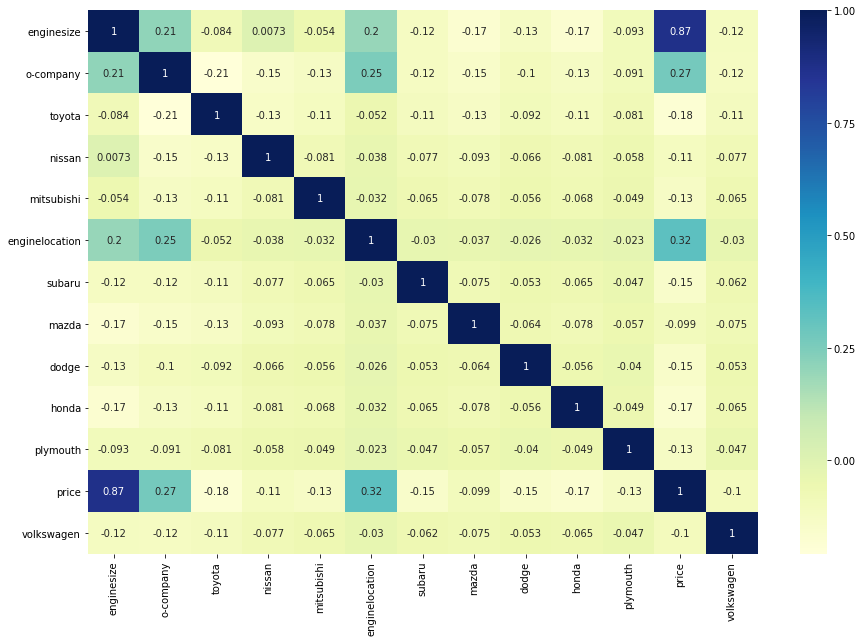

In [32]:
# Through Heatmap checking if we can drop more variables 
mo_col = ['enginesize','o-company','toyota','nissan','mitsubishi','enginelocation','subaru','mazda','dodge','honda','plymouth','price','volkswagen']
mo_train = df[mo_col]
plt.figure(figsize=(15,10))
sns.heatmap(mo_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [33]:
# Model 5
# Dropping 'volkswagen' because of less correlation with price
X5 = X_train_rfe.drop(['curbweight', 'carlength', 'carwidth', 'volkswagen'], axis=1)
X5_sm = sm.add_constant(X5)
ls5 = sm.OLS(y_train, X5_sm).fit()
ls5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     76.57
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           3.19e-56
Time:                        14:20:13   Log-Likelihood:                 175.82
No. Observations:                 164   AIC:                            -327.6
Df Residuals:                     152   BIC:                            -290.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0518      0.022      2.317      0.022       0.008       0.096
enginelocation     0.3160      0.064      4.972      0.000       0.190       0.442
enginesize         1.0656      0.052     20.561      0.000       0.963       1.168
dodge             -0.1431      0.034     -4.267      0.000      -0.209      -0.077
honda             -0.1285      0.031     -4.088      0.000      -0.191      -0.066
mazda             -0.0588      0.029     -2.021      0.045      -0.116      -0.001
mitsubishi        -0.1706      0.031     -5.572      0.000      -0.231      -0.110
nissan            -0.1658      0.027     -6.060      0.000      -0.220      -0.112
o-company         -0.0625      0.022     -2.860      0.005      -0.106      -0.019
plymouth          -0.1417      0.042     -3.346      0.001      -0.225      -0.058
subaru            -0.1398      0.031     -4.506      0.000      -0.201      -0.079
toyota            -0.1510      0.024     -6.316      0.000      -0.198      -0.104
==============================================================================
Omnibus:                       22.304   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.470
Skew:                           0.659   Prob(JB):                     1.63e-09
Kurtosis:                       5.045   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# Checking VIF for model 5
vif = pd.DataFrame()
vif['Features'] = X5.columns
vif['VIF'] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False)

,Features,VIF
1,enginesize,2.22
7,o-company,1.61
10,toyota,1.19
6,nissan,1.14
5,mitsubishi,1.09
0,enginelocation,1.08
9,subaru,1.06
4,mazda,1.05
2,dodge,1.04
3,honda,1.04


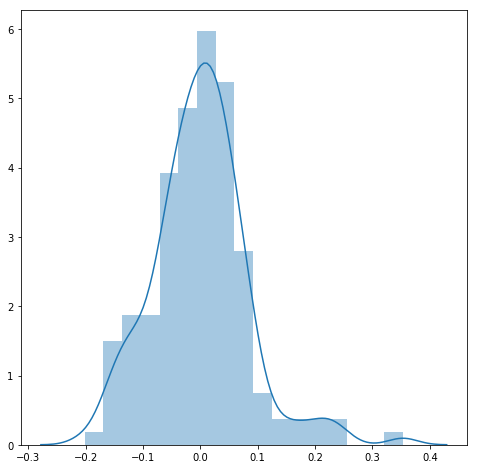

In [35]:
# Checking the distribution of error terms
y_train_pred = 0.0518 + 0.3160*X_train_rfe['enginelocation'] + 1.0656*X_train_rfe['enginesize'] - 0.1431*X_train_rfe['dodge'] - 0.1285*X_train_rfe['honda'] -0.0588*X_train_rfe['mazda'] - 0.1706*X_train_rfe['mitsubishi']-0.1658*X_train_rfe['nissan'] -0.0625*X_train_rfe['o-company'] - 0.1417*X_train_rfe['plymouth'] - 0.1398*X_train_rfe['subaru'] - 0.1510*X_train_rfe['toyota']
res = y_train - y_train_pred

plt.figure(figsize=(8,8))
sns.distplot(res)
plt.show()

We find that model 5 produces best results with minimum number of variables

## Model Evaluation

In [36]:
# Normalising the numerical variables of test datasets
numeric_col = ['wheelbase', 'carlength', 'carheight', 'curbweight', 'peakrpm', 'carwidth', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower','citympg','highwaympg','price']

scaler = MinMaxScaler()

df_test[numeric_col] = scaler.fit_transform(df_test[numeric_col])

df_test.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,buick,dodge,honda,mazda,mitsubishi,nissan,o-company,plymouth,saab,subaru,toyota,volkswagen,volvo,idi,mpfi,o-fuelsys,fwd,rwd,o-cylinder,six,ohc,ohcf,o-carbody,sedan
160,2,1,0,0,0,0.265306,0.341732,0.073171,0.366667,0.132148,0.036697,0.515873,0.536313,0.129032,0.014388,0.265306,1.000000,1.000000,0.054384,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1
186,4,1,0,0,0,0.311953,0.426772,0.207317,0.666667,0.219125,0.087156,0.515873,0.743017,0.129032,0.122302,0.448980,0.541667,0.580645,0.073391,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1
59,3,1,0,1,0,0.355685,0.522835,0.329268,0.444444,0.271985,0.146789,0.674603,0.737430,0.103226,0.115108,0.265306,0.500000,0.516129,0.082178,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
165,3,1,0,1,0,0.230321,0.379528,0.024390,0.322222,0.214320,0.036697,0.555556,0.564246,0.154839,0.316547,1.000000,0.500000,0.419355,0.093552,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
140,4,1,0,1,0,0.195335,0.200000,0.000000,0.666667,0.202307,0.082569,0.857143,0.318436,0.109677,0.035971,0.102041,0.500000,0.483871,0.050994,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [37]:
y_test = df_test.pop('price')
X_test = df_test

print(y_test.shape)
print(X_test.shape)

(41,)
(41, 42)


In [38]:
# Calculating The R-squared score for test data
X_test_new = X_test[vif['Features']]

X_test_sm = sm.add_constant(X_test_new)
y_test_pred = ls5.predict(X_test_sm)

print(r2_score(y_test, y_test_pred))

0.8037650843283173


Text(0, 0.5, 'y_pred')

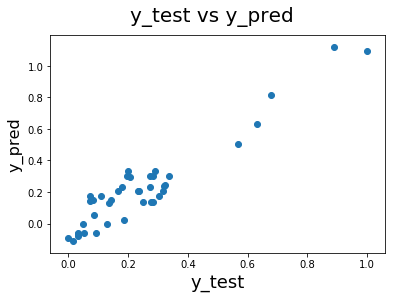

In [39]:
# Visualising the graph of Y-test vs Y_test_pred
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)  

We can see the equation of bestfit line is

$price = 0.0518 + 0.3160*enginelocation + 1.0656*enginesize - 0.1431*dodge - 0.1285*honda -0.0588*mazda - 0.1706*mitsubishi-0.1658*nissan -0.0625*o-company - 0.1417*plymouth - 0.1398*subaru - 0.1510*toyota$

Important variables:
 - Enginelocation
 - Enginesize


Less contributing variables:
 - Mitsubishi
 - Nissan